In [40]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis
from scipy import stats

# For correlation analysis
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# For interactive visualization
import plotly.express as px

In [42]:
df_team_pitching = pd.read_csv('C:\\Users\\schin\\mlb-scraper\\team_pitching_stats_2023.csv')
df_team_batting = pd.read_csv('C:\\Users\\schin\\mlb-scraper\\team_batting_stats_2023.csv')
df_team_WAA = pd.read_csv('C:\\Users\\schin\\mlb-scraper\\team_WAA_stats_2023.csv')
df_team_fielding = pd.read_csv('C:\\Users\\schin\\mlb-scraper\\team_fielding_stats_2023.csv')
df_team_standings = pd.read_csv("C:\\Users\\schin\\mlb-scraper\\team_standings_2023.csv")

In [63]:
# Replace Null values
df_team_standings.fillna(0, inplace=True)

# Drop duplicate columns aside from first 'Tm'
df_team_standings = df_team_standings.loc[:, ~df_team_standings.columns.duplicated()]


# First 5 columns
df_team_standings = df_team_standings.iloc[:, :5]


# Remove the last row
df_team_standings.drop(df_team_standings.tail(1).index, inplace=True)

print(df_team_standings)


  Rk              Tm    W   L  W-L%
0  1  Atlanta Braves  104  58  .642


In [56]:
# Load CSV
df_team_pitching = pd.read_csv("C:\\Users\\schin\\mlb-scraper\\team_pitching_stats_2023.csv")
df_team_batting = pd.read_csv("C:\\Users\\schin\\mlb-scraper\\team_batting_stats_2023.csv")
df_team_fielding = pd.read_csv("C:\\Users\\schin\\mlb-scraper\\team_fielding_stats_2023.csv")
df_team_standings = pd.read_csv("C:\\Users\\schin\\mlb-scraper\\team_standings_2023.csv")

# Concatentate into single frame
combined_2023 = pd.concat([df_team_pitching, df_team_batting, df_team_fielding, df_team_standings], axis=1)

# Display all
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Replace NaN values
combined_2023.fillna(0, inplace=True)

# Drop duplicate columns except for the first occurrence of 'Tm'
combined_2023 = combined_2023.loc[:, ~combined_2023.columns.duplicated()]

# Remove the last Row of non-numerical data from every column
combined_2023.drop(combined_2023.tail(1).index, inplace=True)

# Display the combined DataFrame
print(combined_2023)


                       Tm   #P  PAge  RA/G     W     L  W-L%   ERA     G  \
0    Arizona Diamondbacks   34  28.5  4.70    84    78  .519  4.48   162   
1          Atlanta Braves   33  29.9  4.42   104    58  .642  4.14   162   
2       Baltimore Orioles   31  28.4  4.19   101    61  .623  3.89   162   
3          Boston Red Sox   33  30.0  4.79    78    84  .481  4.52   162   
4            Chicago Cubs   27  29.6  4.46    83    79  .512  4.08   162   
5       Chicago White Sox   32  29.2  5.19    61   101  .377  4.87   162   
6         Cincinnati Reds   40  27.7  5.07    82    80  .506  4.83   162   
7     Cleveland Guardians   29  26.1  4.30    76    86  .469  3.96   162   
8        Colorado Rockies   34  29.7  5.91    59   103  .364  5.67   162   
9          Detroit Tigers   32  27.7  4.57    78    84  .481  4.24   162   
10         Houston Astros   24  29.2  4.31    90    72  .556  3.94   162   
11     Kansas City Royals   36  29.1  5.30    56   106  .346  5.17   162   
12     Los A

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_2023 = combined_2023.apply(pd.to_numeric, errors='coerce')
combined_2023.fillna(0, inplace=True)
print(combined_2023)



     Tm   #P  PAge  RA/G     W     L   W-L%   ERA     G    GS    GF  CG  tSho  \
0   0.0   34  28.5  4.70    84    78  0.519  4.48   162   162   161   1     9   
1   0.0   33  29.9  4.42   104    58  0.642  4.14   162   162   161   1    15   
2   0.0   31  28.4  4.19   101    61  0.623  3.89   162   162   162   0    12   
3   0.0   33  30.0  4.79    78    84  0.481  4.52   162   162   162   0     5   
4   0.0   27  29.6  4.46    83    79  0.512  4.08   162   162   161   1    13   
5   0.0   32  29.2  5.19    61   101  0.377  4.87   162   162   160   2     7   
6   0.0   40  27.7  5.07    82    80  0.506  4.83   162   162   162   0     6   
7   0.0   29  26.1  4.30    76    86  0.469  3.96   162   162   161   1    13   
8   0.0   34  29.7  5.91    59   103  0.364  5.67   162   162   162   0     6   
9   0.0   32  27.7  4.57    78    84  0.481  4.24   162   162   162   0    15   
10  0.0   24  29.2  4.31    90    72  0.556  3.94   162   162   160   2     7   
11  0.0   36  29.1  5.30    

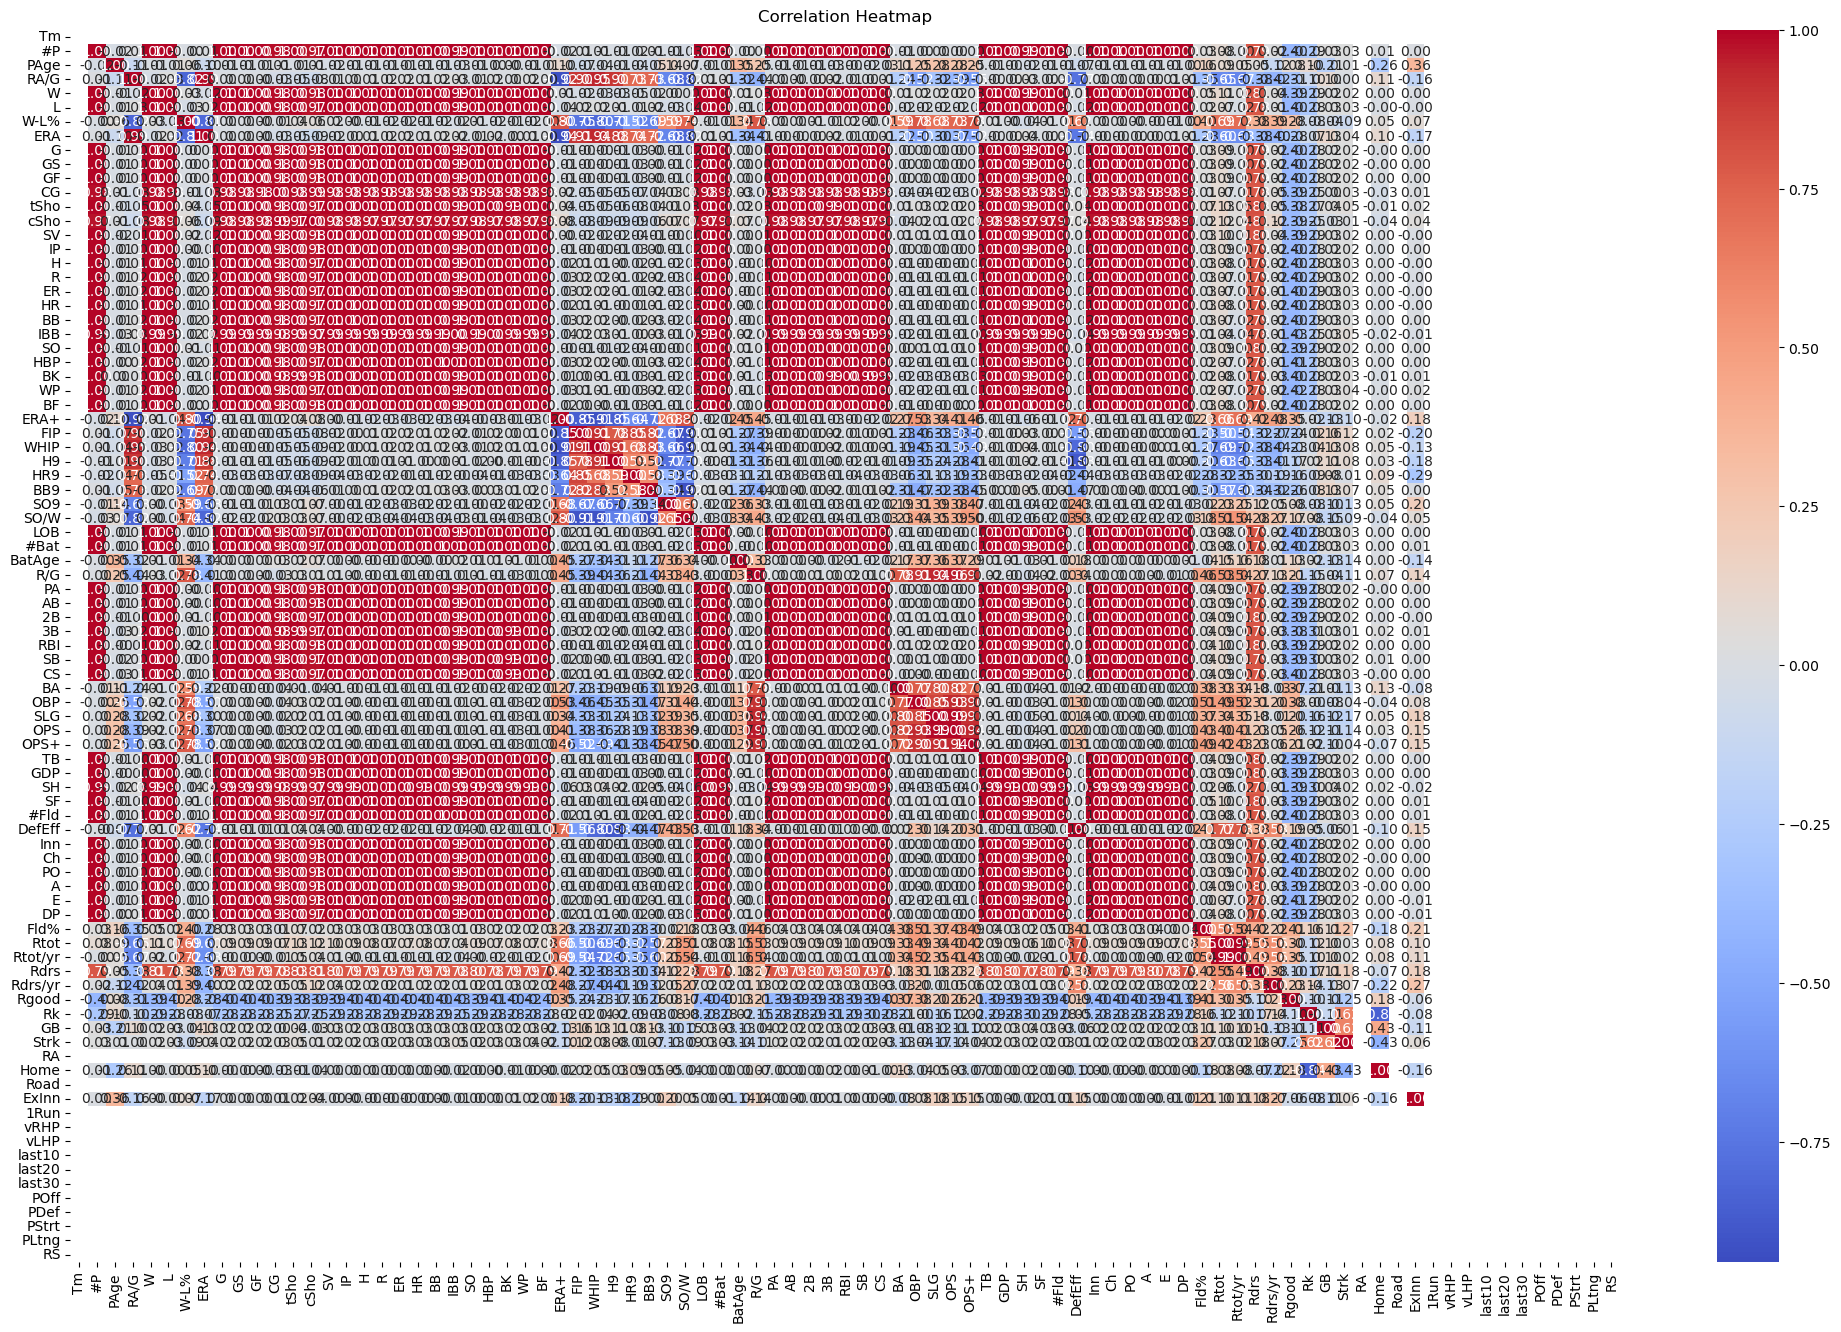

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix of all data
correlation matrix
correlation_matrix = combined_2023.corr()

# Visualize w/ heatmap
plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
print(df_team_pitching.columns)
print(df_team_batting.columns)

Index(['Tm', '#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF',
       'CG', 'tSho', 'cSho', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB',
       'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9',
       'BB9', 'SO9', 'SO/W', 'LOB'],
      dtype='object')
Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')


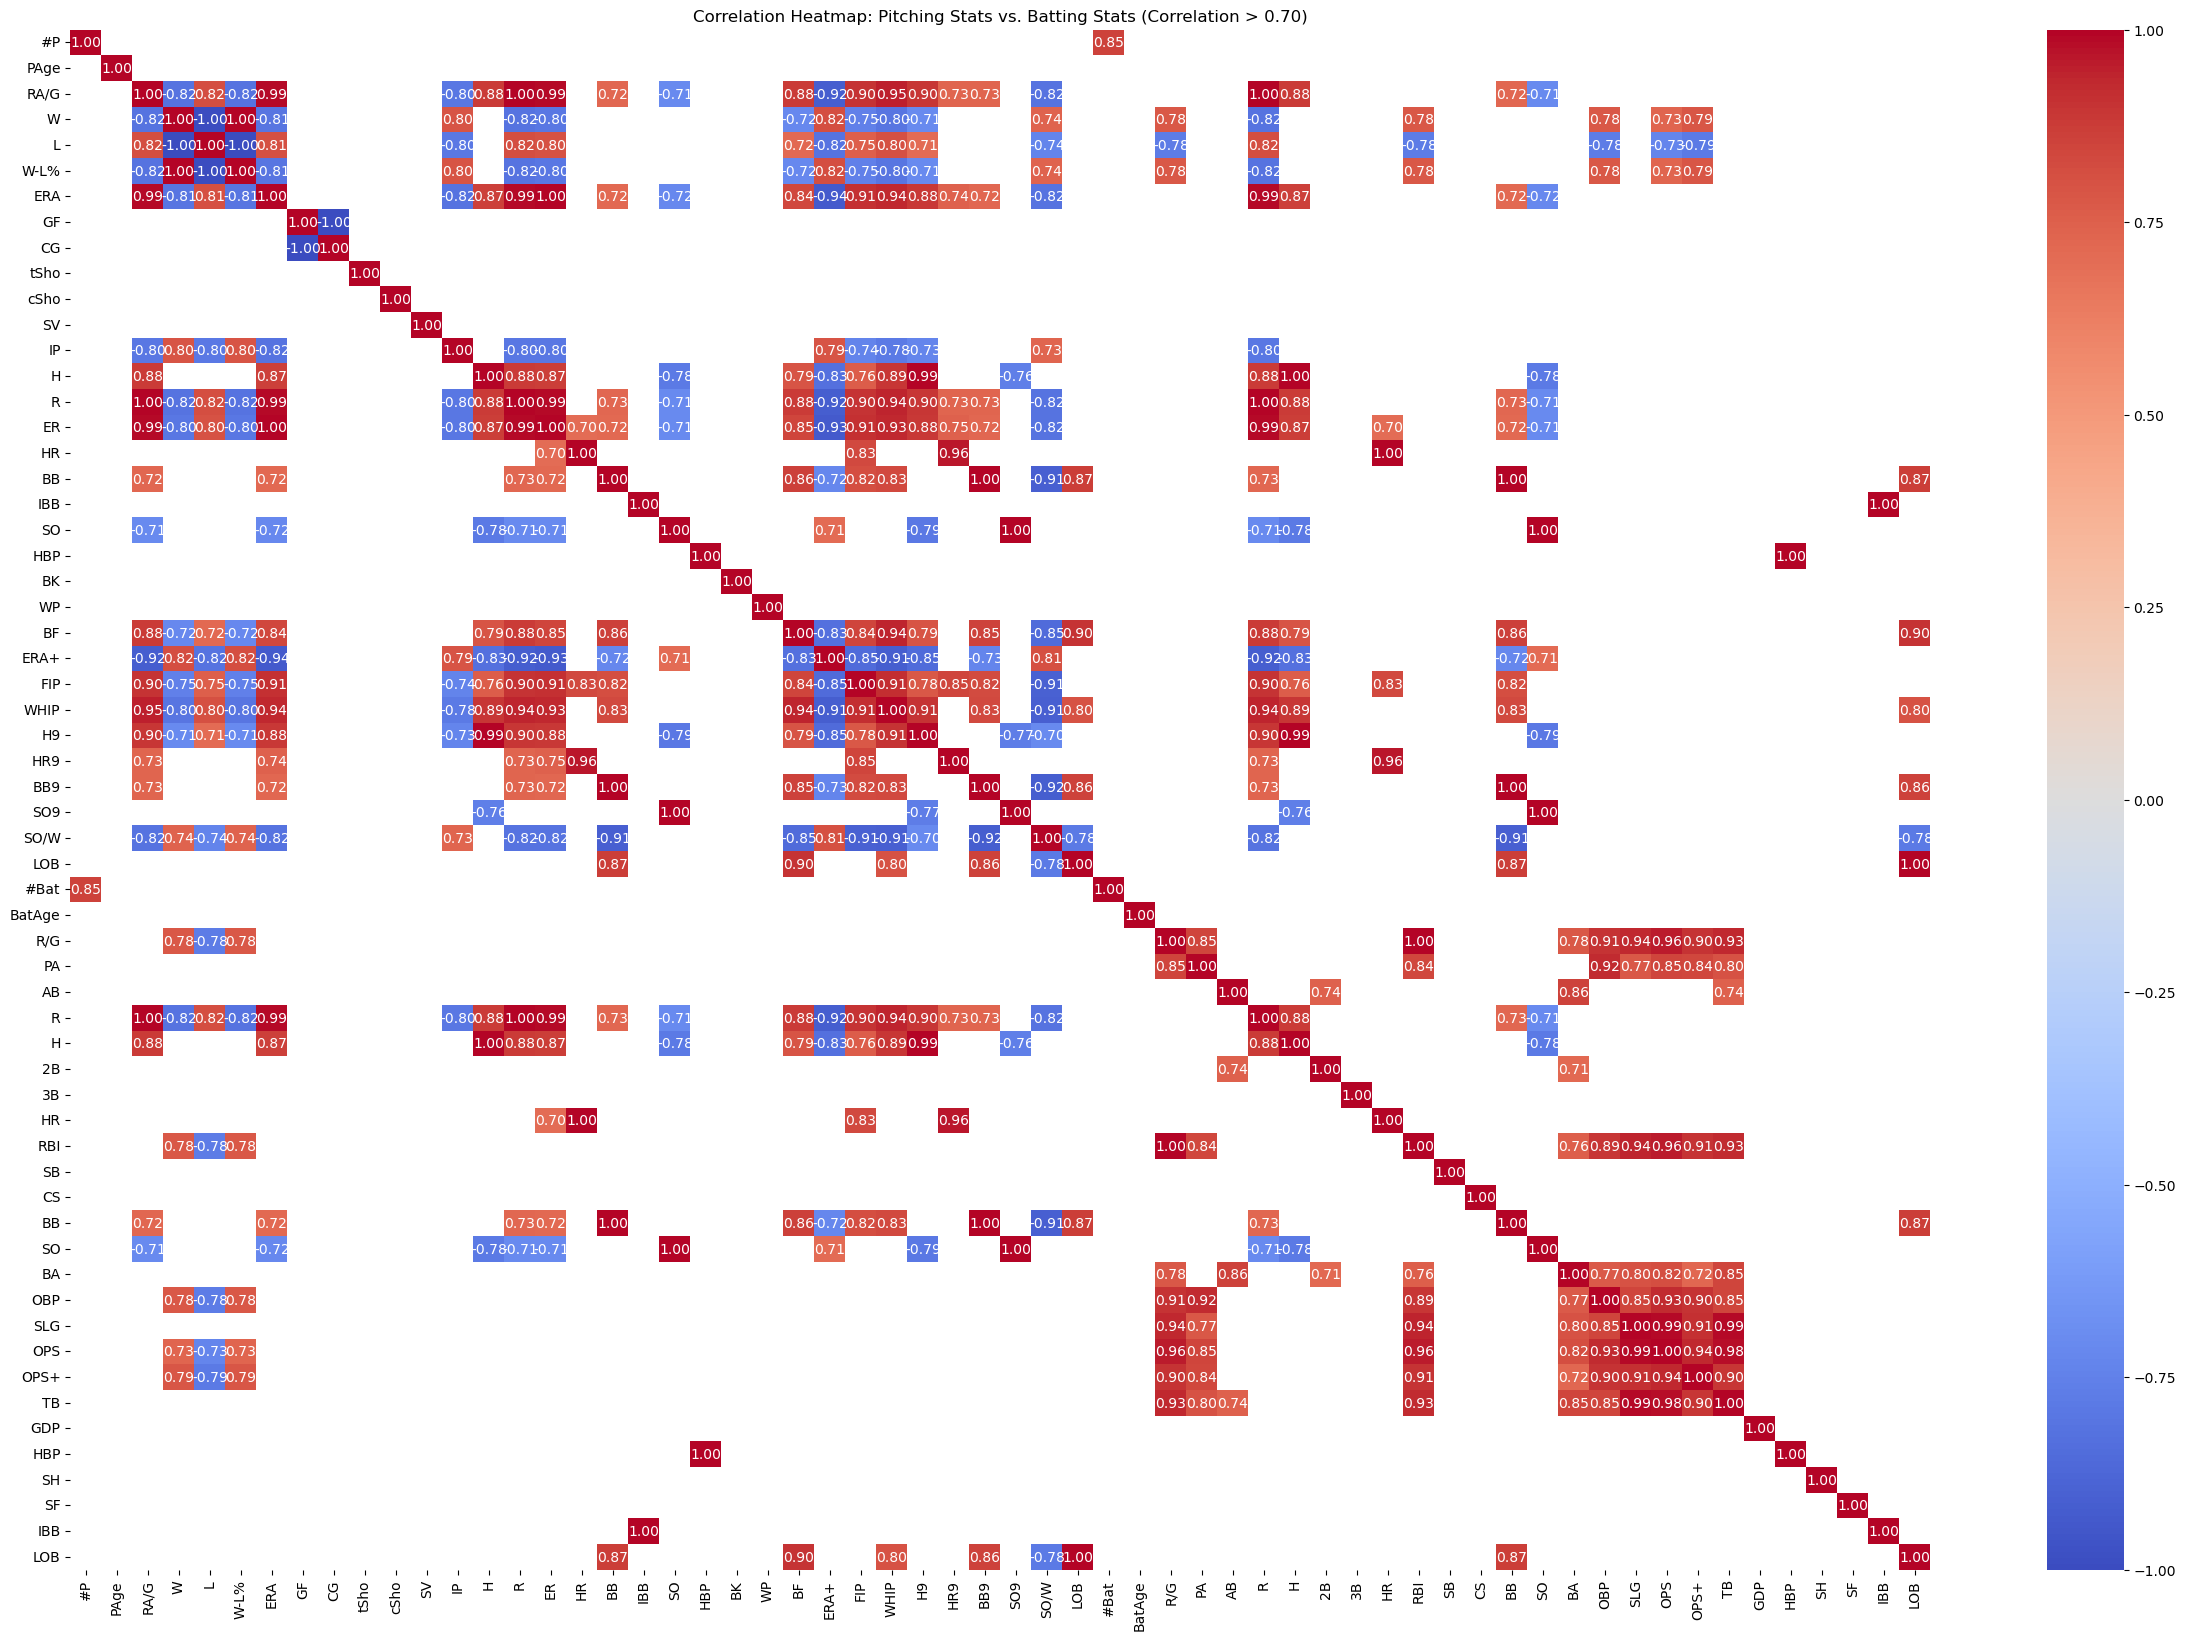

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select pitching stats / batting stats columns
pitching_stats_cols = ['#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'GF', 'CG', 'tSho', 'cSho', 
        'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 
        'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'LOB'] 
batting_stats_cols = ['#Bat', 'BatAge', 'R/G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 
        'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 
        'HBP', 'SH', 'SF', 'IBB', 'LOB']

# Combine frames
selected_cols = pitching_stats_cols + batting_stats_cols

# Select only the rows with numerical data
numerical_data = combined_2023.iloc[:-1].astype(float)

# Correlation matrix
correlation_matrix = numerical_data[selected_cols].corr()

# Filter
filtered_correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.70]

# Visualize filtered correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Pitching Stats vs. Batting Stats (Correlation > 0.70)')
plt.show()

In [9]:
# Correlative stats for pitching / fielding stats of 2023

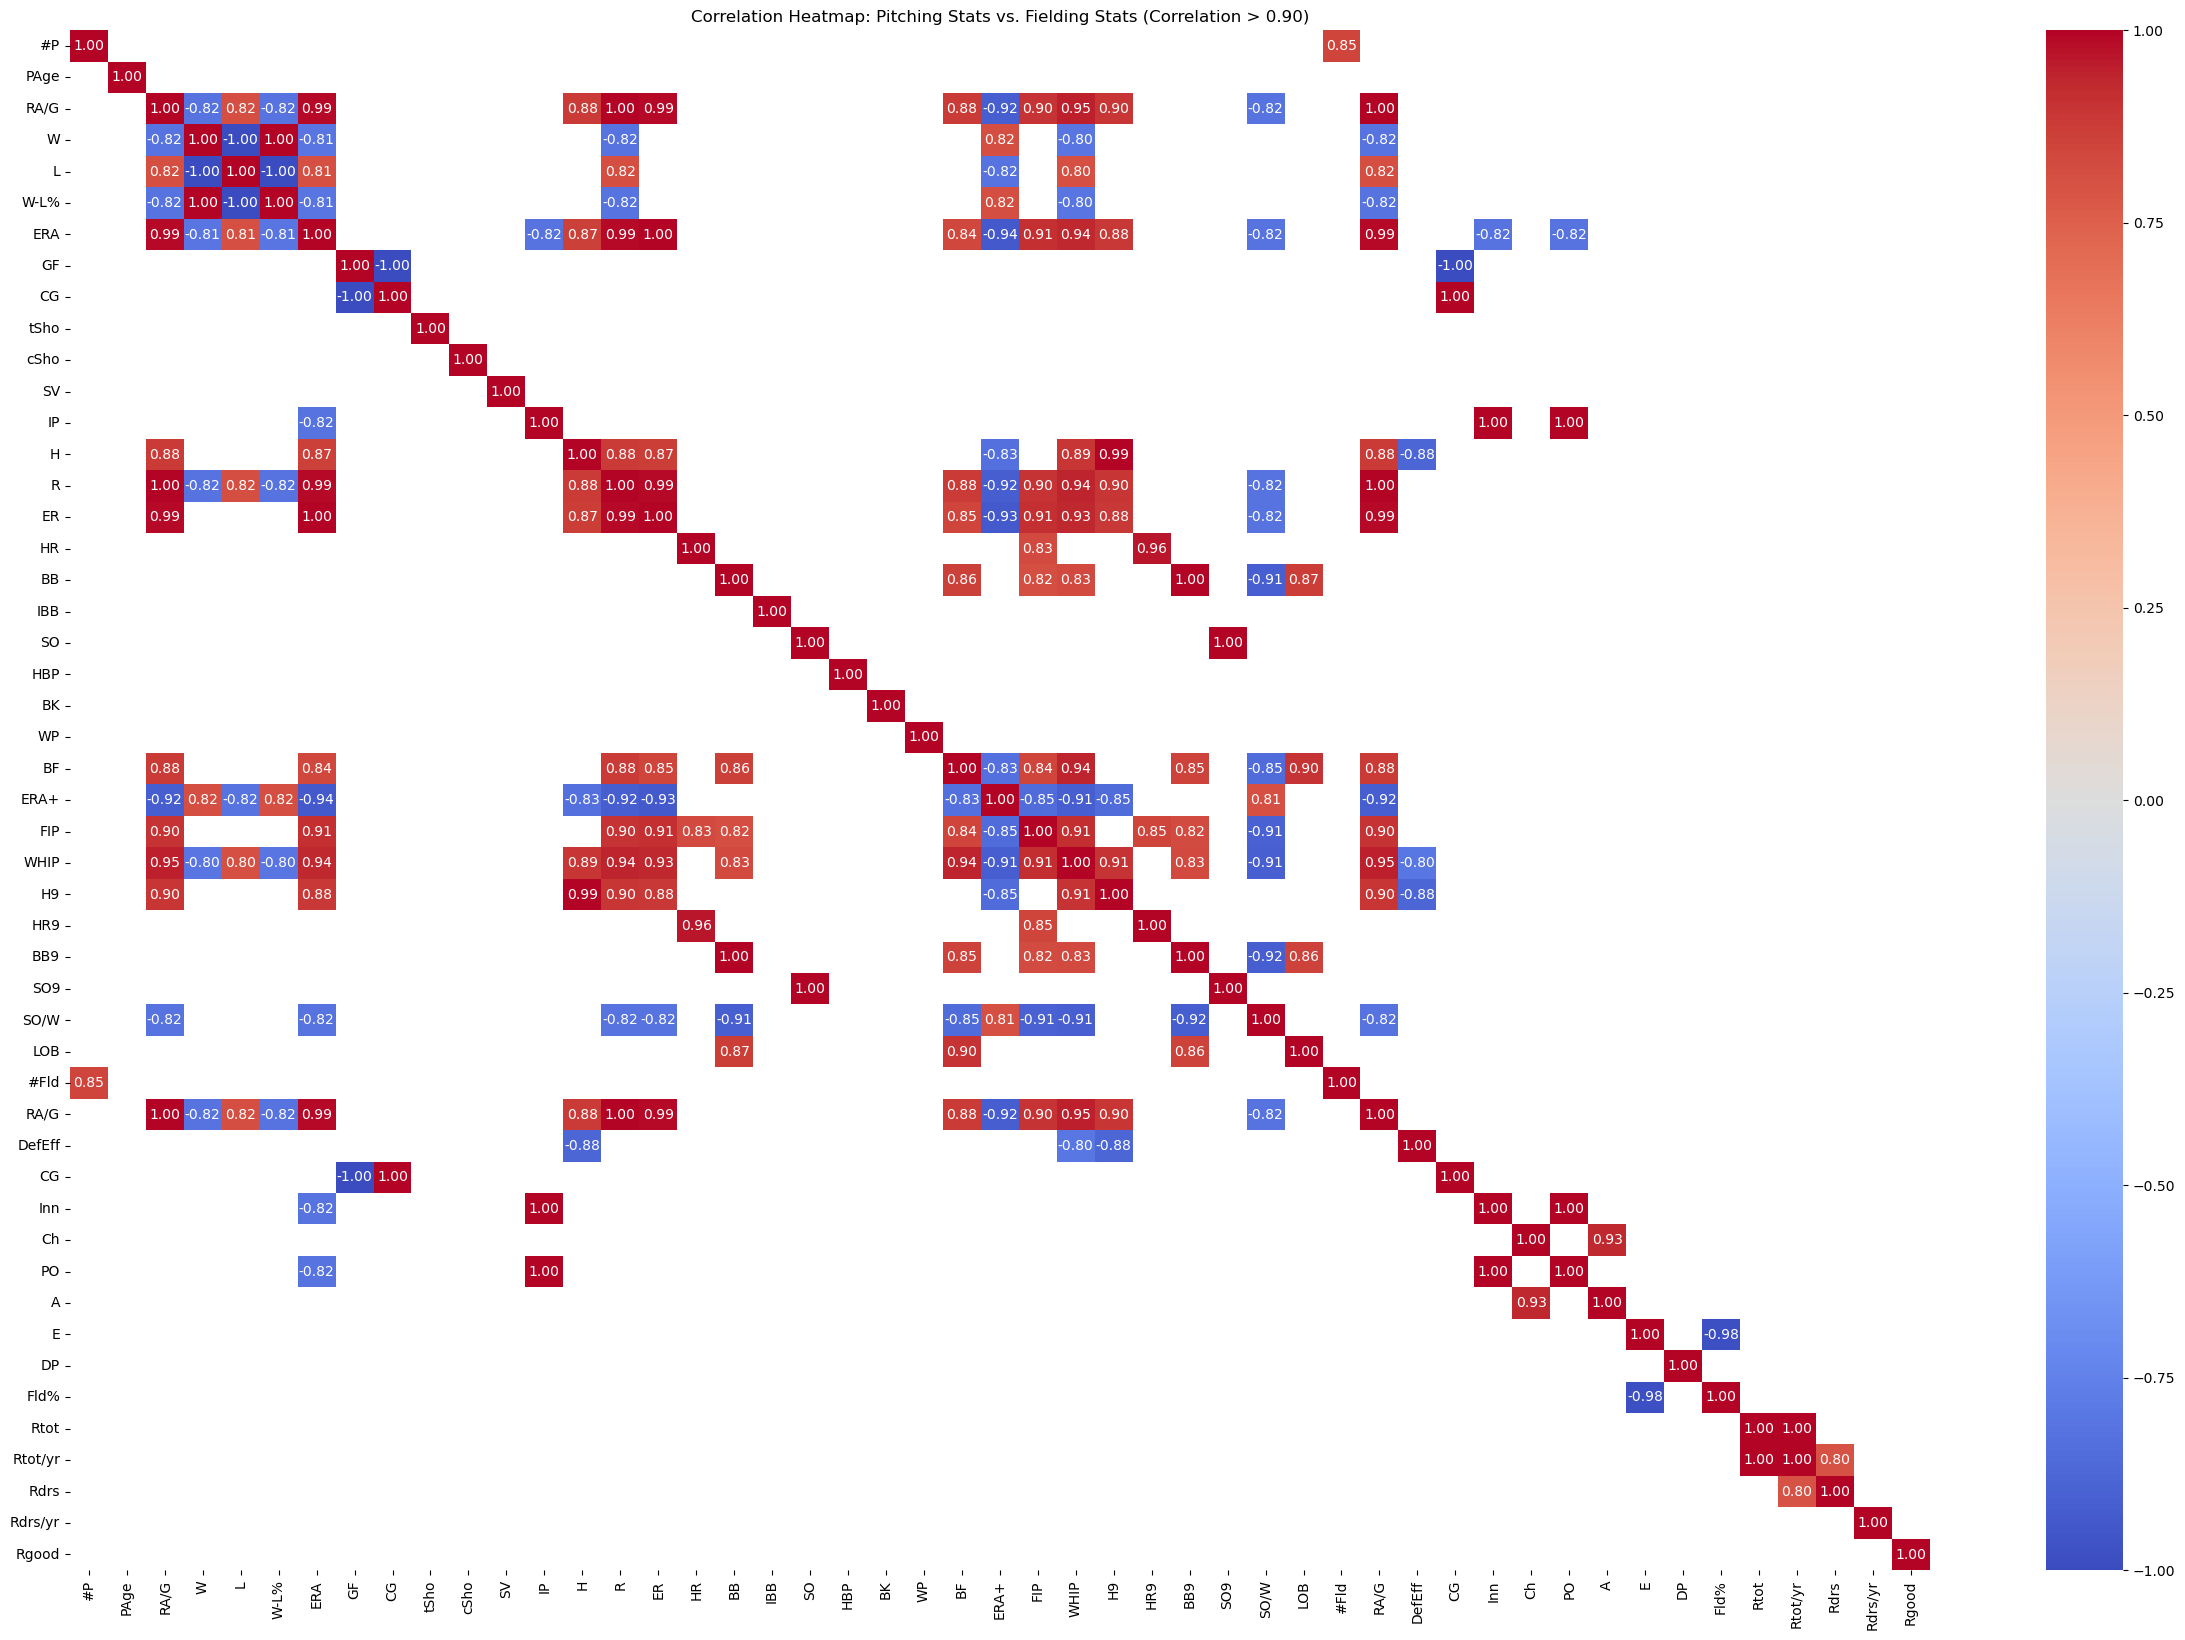

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select pitching / fielding stats columns
pitching_stats_cols = ['#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'GF', 'CG', 'tSho', 'cSho', 
        'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 
        'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'LOB']
fielding_stats_cols = ['#Fld', 'RA/G', 'DefEff', 'CG', 
        'Inn', 'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 
        'Rtot/yr', 'Rdrs', 'Rdrs/yr', 'Rgood']

# Concatenate pitching stats / fielding stats columns
selected_cols = pitching_stats_cols + fielding_stats_cols

# Select only the rows with numerical data
numerical_data = combined_2023.iloc[:-1].astype(float)

# Compute correlation matrix
correlation_matrix = numerical_data[selected_cols].corr()

# Filter
filtered_correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.80]

# Visualize filtered correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Pitching Stats vs. Fielding Stats (Correlation > 0.90)')
plt.show()

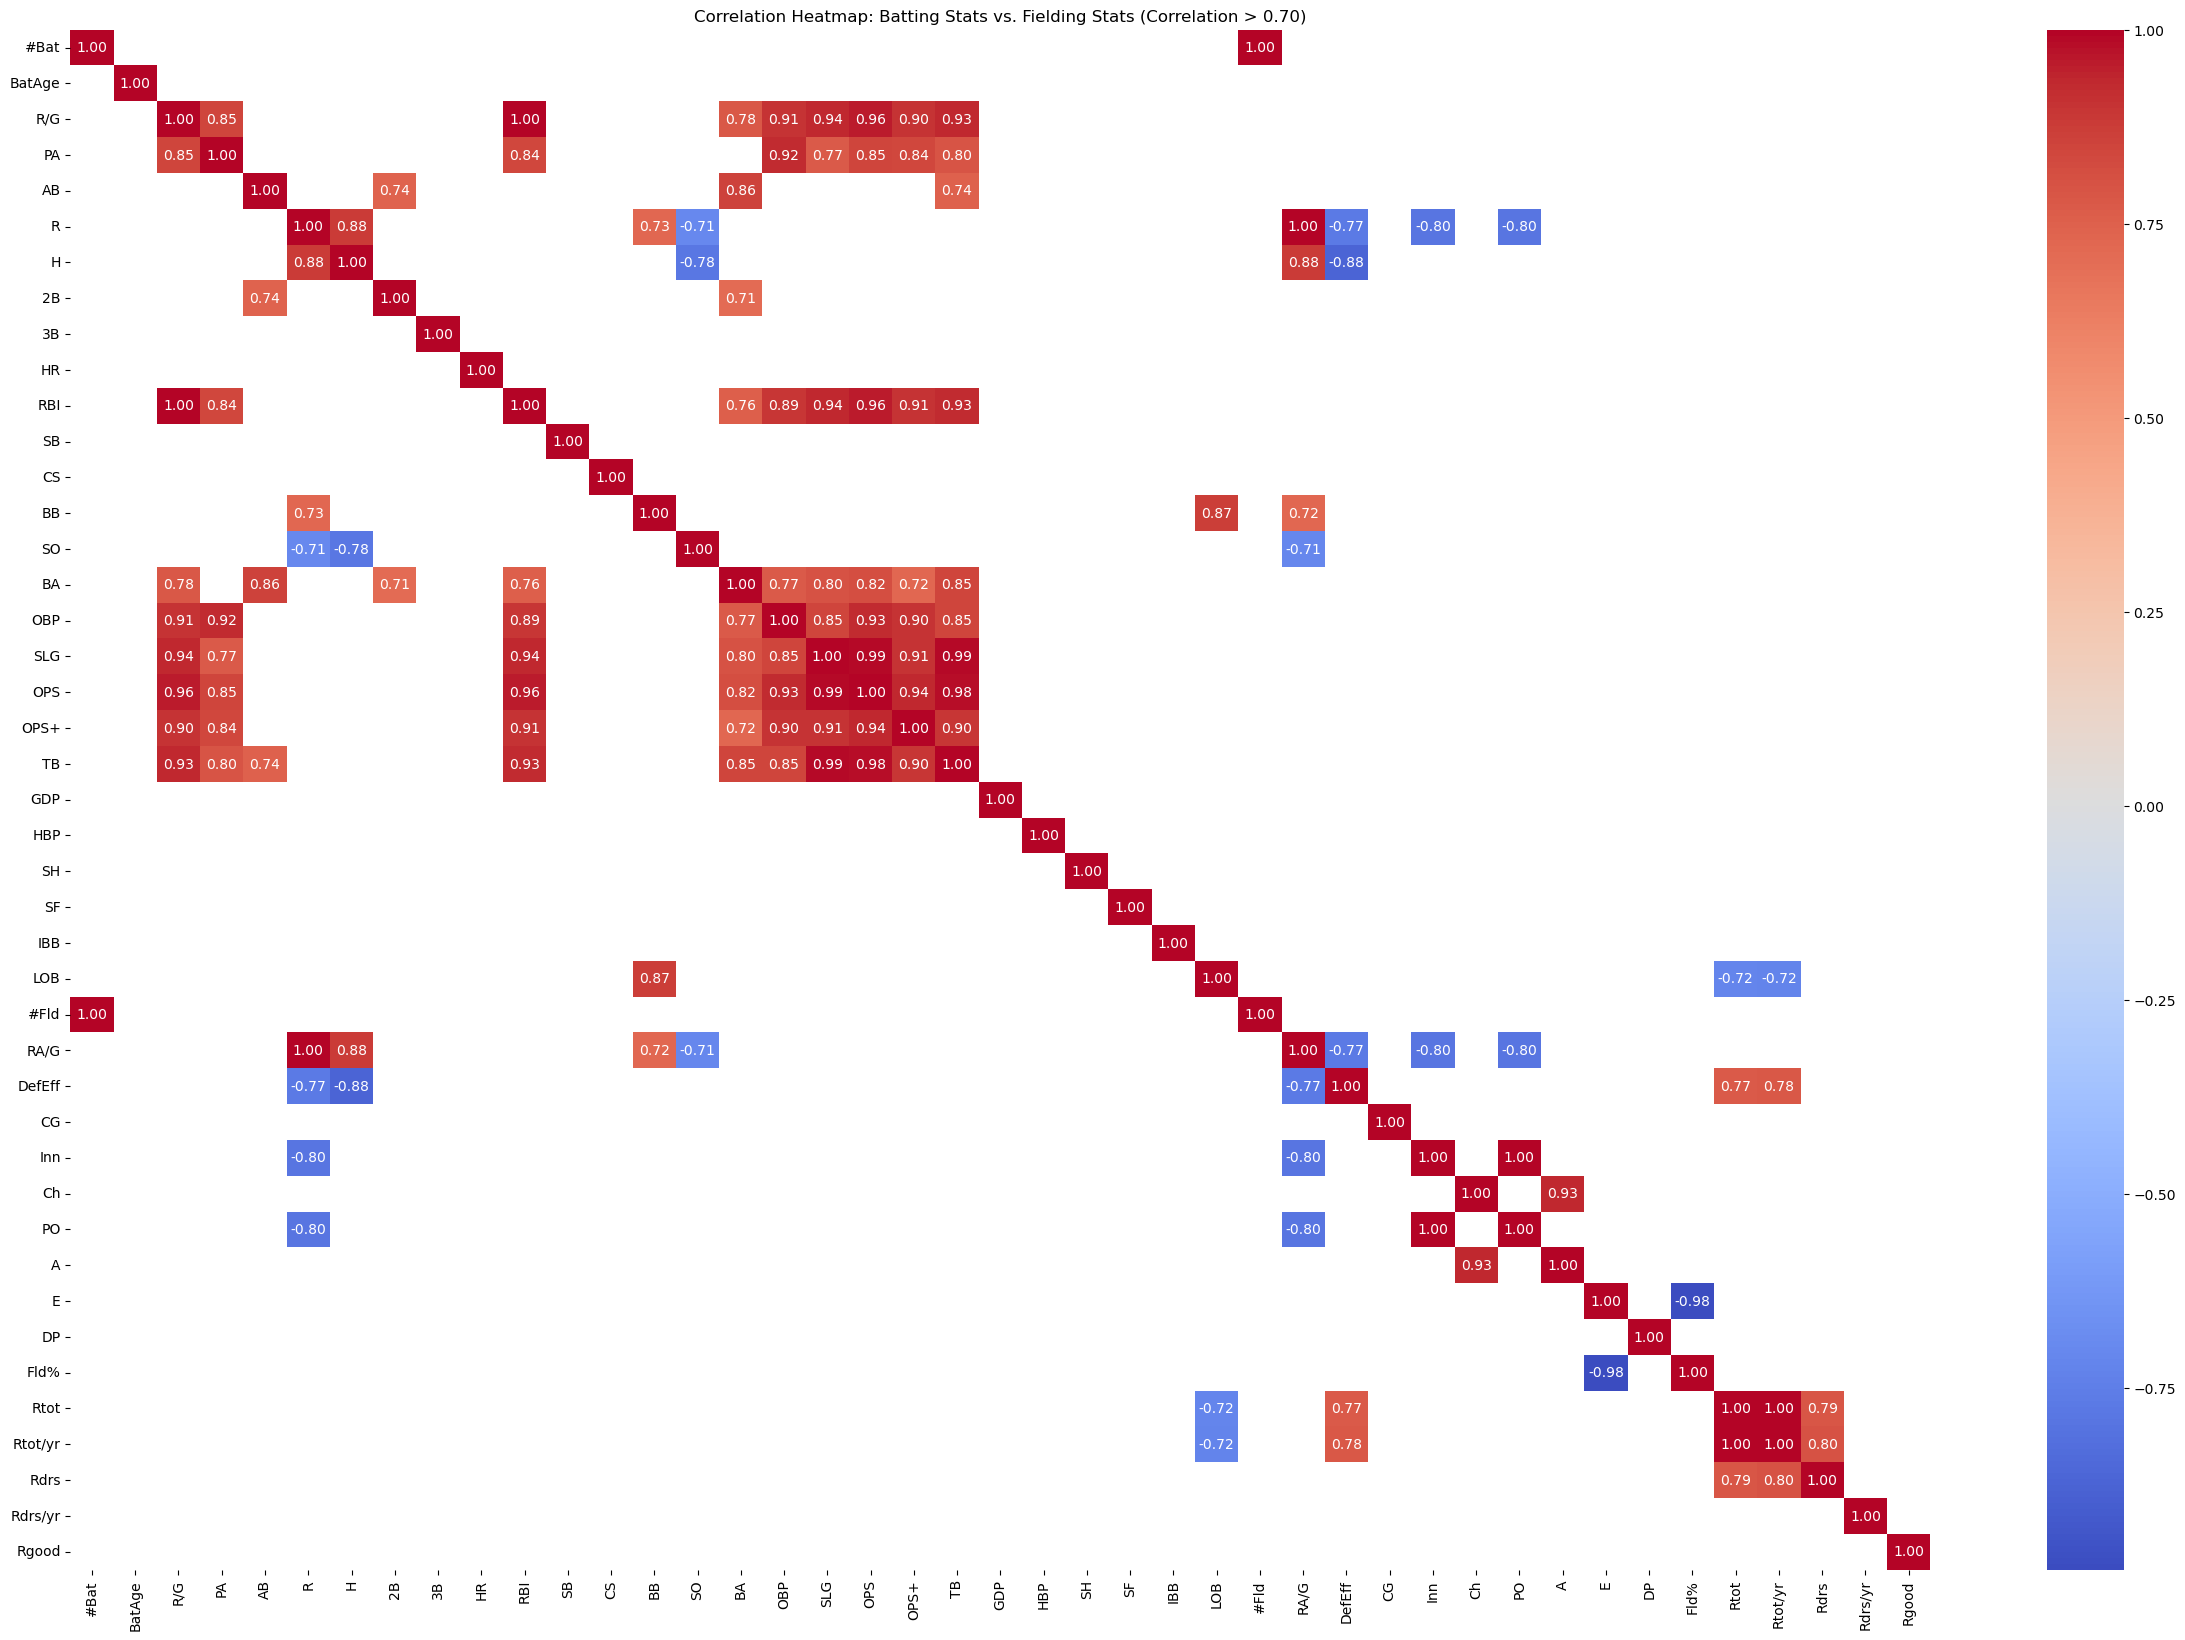

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select battings / fielding stats columns
batting_stats_cols = ['#Bat', 'BatAge', 'R/G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 
        'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 
        'HBP', 'SH', 'SF', 'IBB', 'LOB']
fielding_stats_cols = ['#Fld', 'RA/G', 'DefEff', 'CG', 
        'Inn', 'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 
        'Rtot/yr', 'Rdrs', 'Rdrs/yr', 'Rgood']

# Concatenate batting / fielding stats columns
selected_cols = batting_stats_cols + fielding_stats_cols

# Select only the rows with numerical data
numerical_data = combined_2023.iloc[:-1].astype(float)

# Compute correlation matrix for selected columns
correlation_matrix = numerical_data[selected_cols].corr()

# Filter
filtered_correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.70]

# Visualize filtered correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Batting Stats vs. Fielding Stats (Correlation > 0.70)')
plt.show()

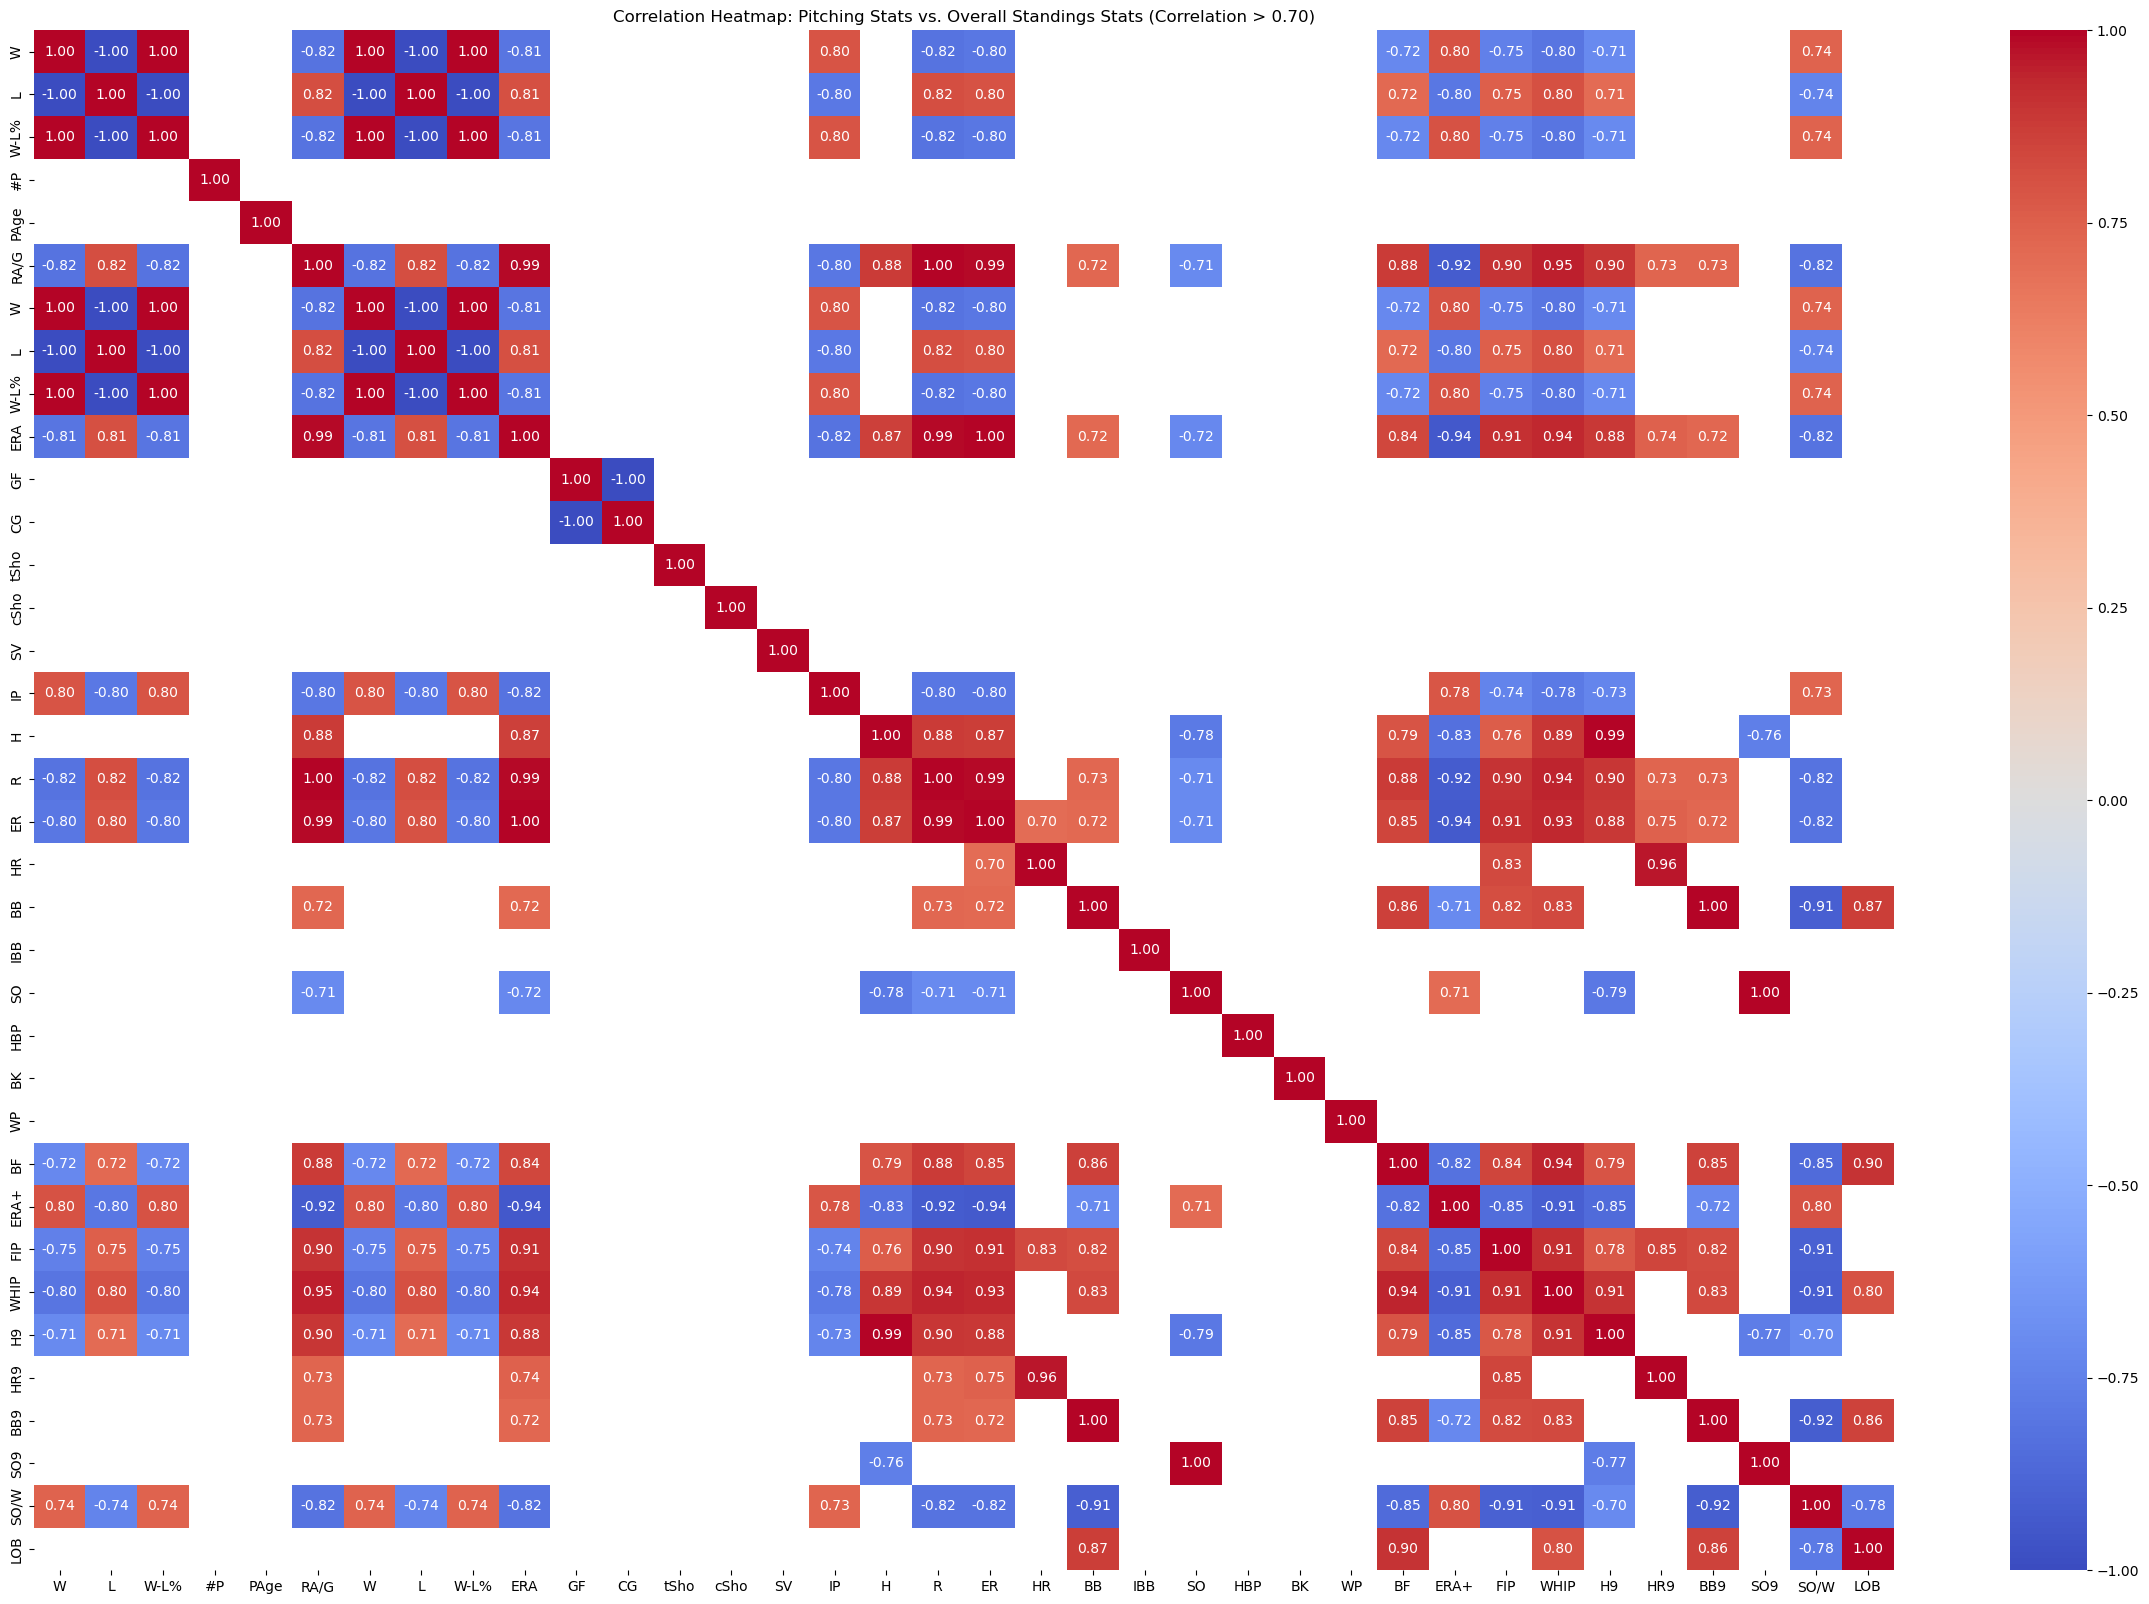

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select pitching stats / standings stats columns
pitching_stats_cols = ['#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'GF', 'CG', 'tSho', 'cSho', 
        'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 
        'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W', 'LOB']
standings_stats_cols = ['W', 'L', 'W-L%']

# Concatenate pitching / standings stats columns
selected_cols = standings_stats_cols + pitching_stats_cols

# Select only the rows with numerical data
numerical_data = combined_2023.iloc[:-1].astype(float)

# Compute correlation matrix for selected columns
correlation_matrix = numerical_data[selected_cols].corr()

# Filter 
filtered_correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.70]

# Visualize filtered correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Pitching Stats vs. Overall Standings Stats (Correlation > 0.70)')
plt.show()

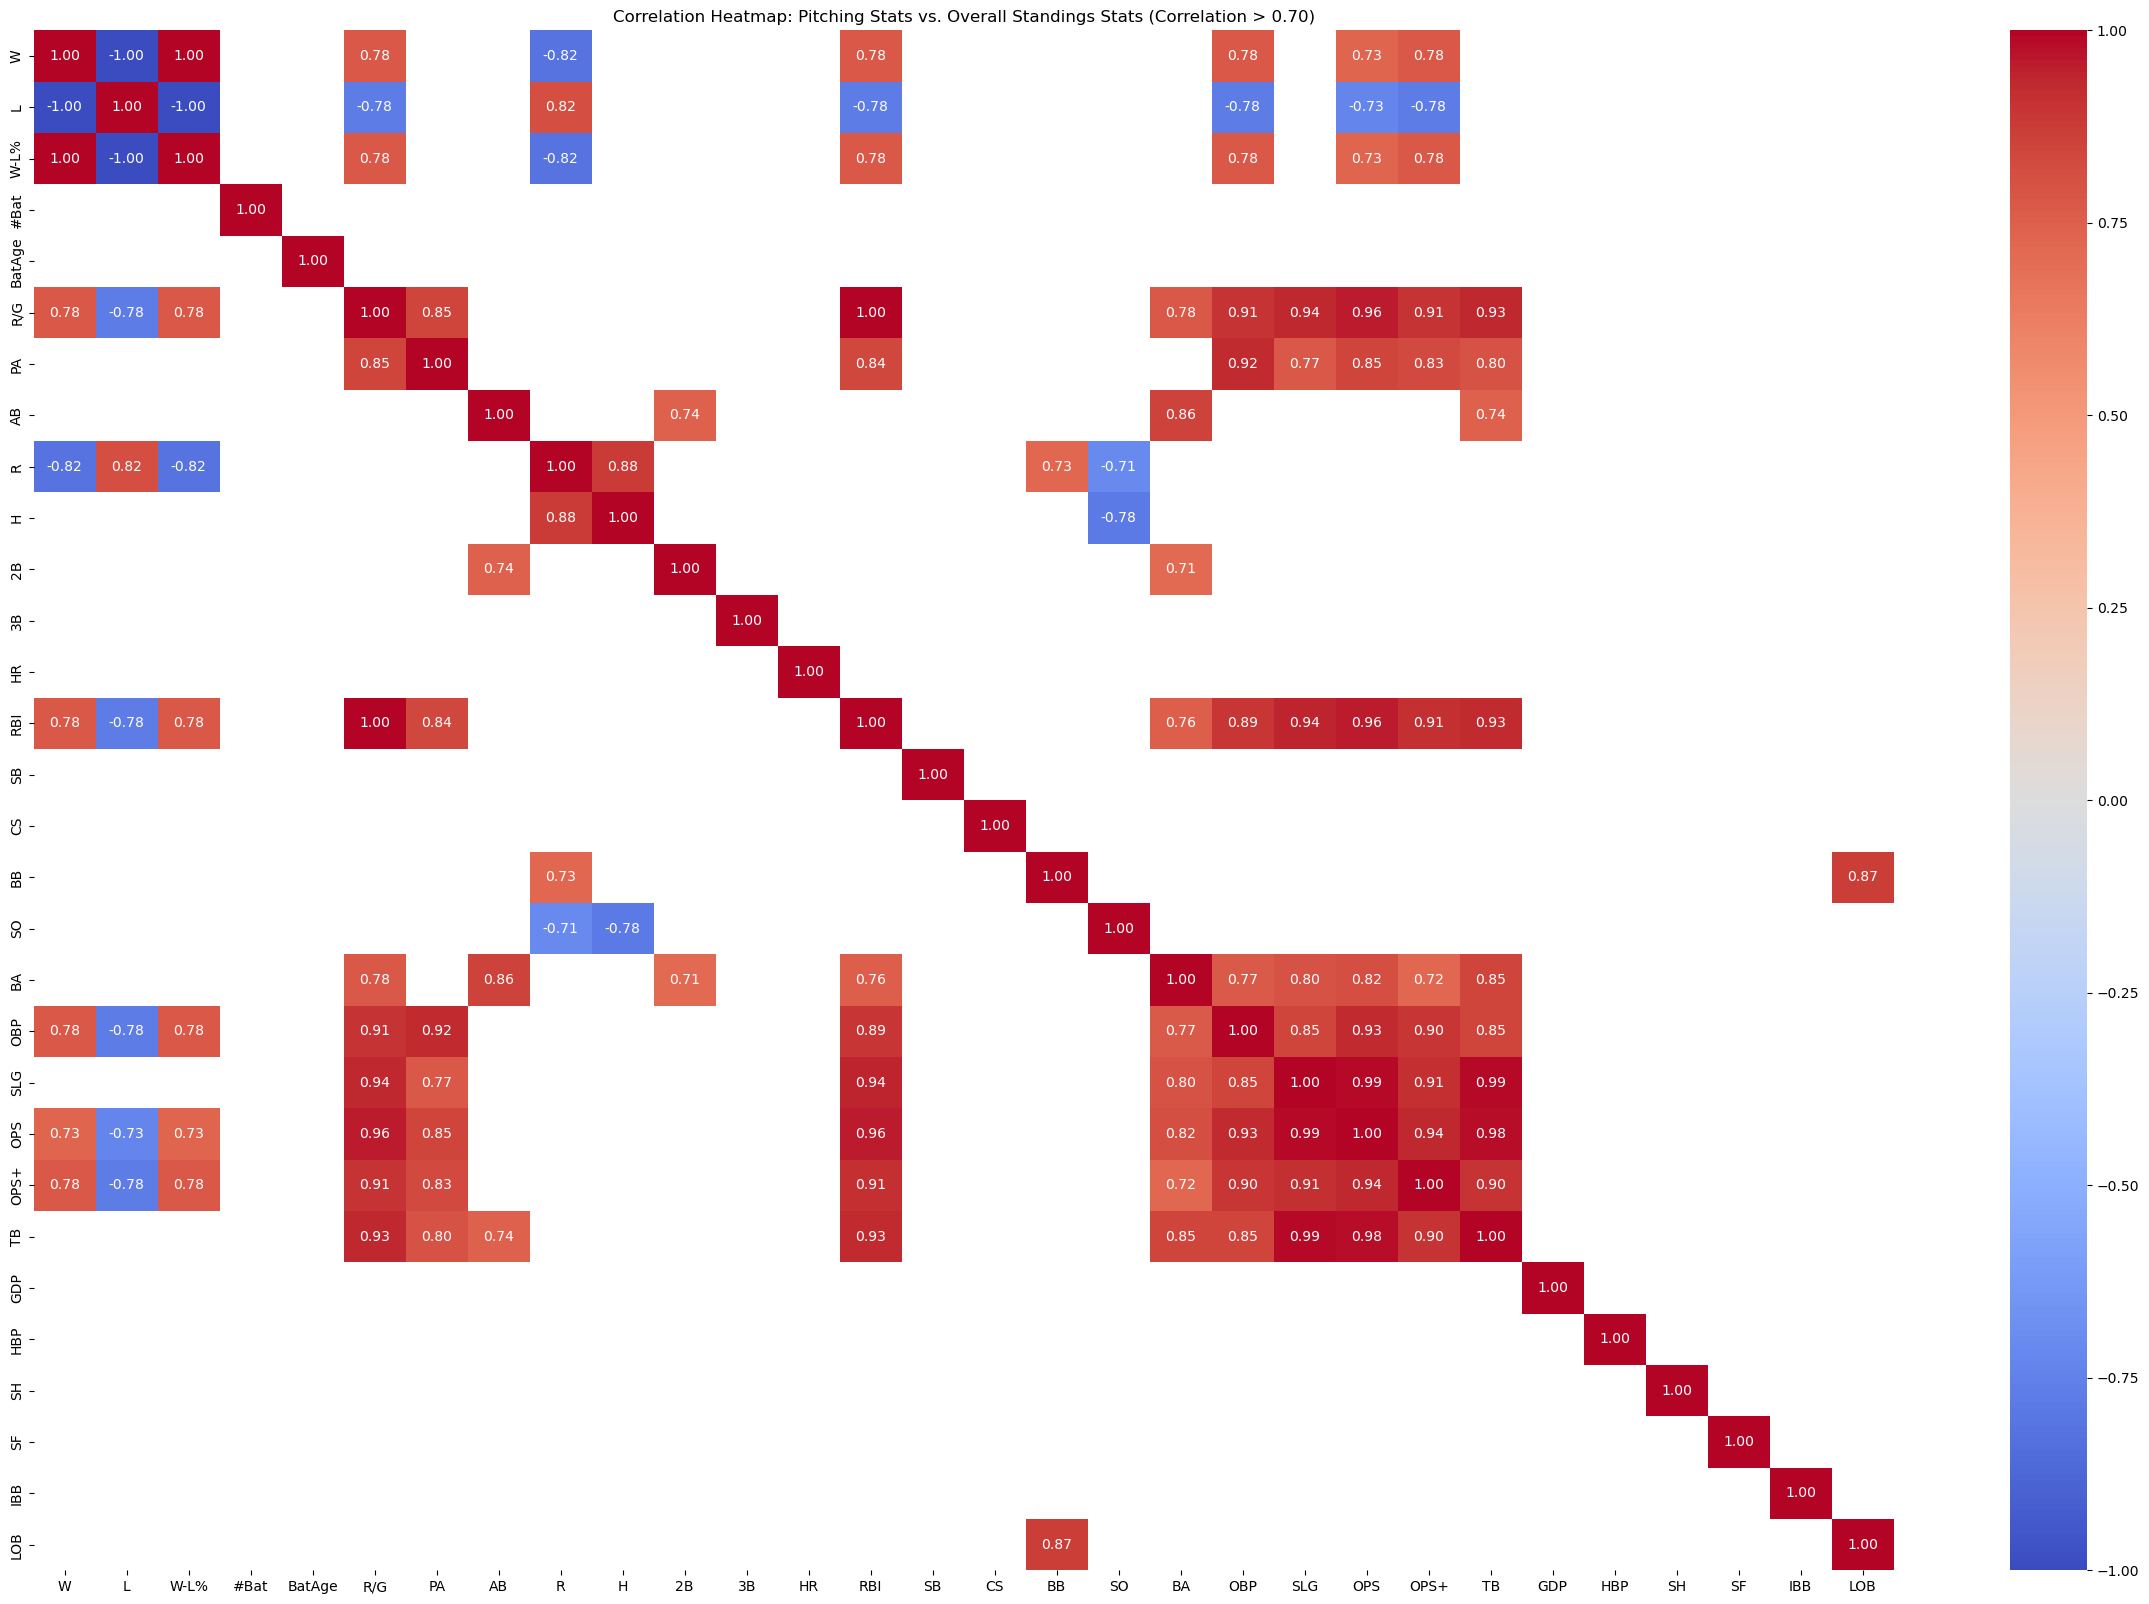

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select batting / standings stats columns
batting_stats_cols = ['#Bat', 'BatAge', 'R/G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 
        'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 
        'HBP', 'SH', 'SF', 'IBB', 'LOB']      # Add more batting stats columns as needed
standings_stats_cols = ['W', 'L', 'W-L%']      # Add more batting stats columns as needed

# Concatenate batting / standings_stats_cols
selected_cols = standings_stats_cols + batting_stats_cols

# Select only the rows with numerical data
numerical_data = combined_2023.iloc[:-1].astype(float)

# Compute correlation matrix 
correlation_matrix = numerical_data[selected_cols].corr()

# Filter
filtered_correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.70]

# Visualize with heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Pitching Stats vs. Overall Standings Stats (Correlation > 0.70)')
plt.show()

In [ ]:
# Predicitve modeling

In [39]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
random_seed = 42

# Features for predicting Wins
win_features = ['IP', 'ERA+', 'SO/W', 'R/G', 'RBI', 'OBP', 'OPS', 'OPS+', 'Inn', 'PO', 'Rtot/yr']

# Features for predicting Losses
loss_features = ['RA/G', 'ERA', 'R', 'ER', 'BF', 'FIP', 'WHIP', 'H9', 'R']

# Combine selected features
all_features = list(set(win_features + loss_features))

# Extract the selected features from the dataset
X = combined_2023[all_features]

# Target variable for predicting Wins
y_wins = combined_2023['W']

# Target variable for predicting Losses
y_losses = combined_2023['L']

# Split data into training and test sets
X_train_wins, X_test_wins, y_train_wins, y_test_wins = train_test_split(X, y_wins, test_size=0.2, random_state=random_seed)
X_train_losses, X_test_losses, y_train_losses, y_test_losses = train_test_split(X, y_losses, test_size=0.2, random_state=random_seed)

# Scale the features
scaler = StandardScaler()
X_train_wins = scaler.fit_transform(X_train_wins)
X_test_wins = scaler.transform(X_test_wins)
X_train_losses = scaler.fit_transform(X_train_losses)
X_test_losses = scaler.transform(X_test_losses)

# Define the model
rf_model = RandomForestRegressor(random_state=random_seed)

# Define
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for hyperparameter tuning
grid_search_wins = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_wins.fit(X_train_wins, y_train_wins)

# Best parameters for wins
best_params_wins = grid_search_wins.best_params_
print(f"Best parameters for wins: {best_params_wins}")

# Train the final model for wins
best_model_wins = grid_search_wins.best_estimator_
best_model_wins.fit(X_train_wins, y_train_wins)

# Predictions and MSE for wins
y_pred_wins = best_model_wins.predict(X_test_wins)
mse_wins = mean_squared_error(y_test_wins, y_pred_wins)
print(f"Mean Squared Error (Wins): {mse_wins}")

# Cross-validation score for wins
cv_score_wins = cross_val_score(best_model_wins, X_train_wins, y_train_wins, cv=5)
print(f"Cross-validation score (Wins): {cv_score_wins.mean()}")

# Repeat for losses
grid_search_losses = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_losses.fit(X_train_losses, y_train_losses)

# Best parameters for losses
best_params_losses = grid_search_losses.best_params_
print(f"Best parameters for losses: {best_params_losses}")

# Train the final model for losses
best_model_losses = grid_search_losses.best_estimator_
best_model_losses.fit(X_train_losses, y_train_losses)

# Predictions and MSE for losses
y_pred_losses = best_model_losses.predict(X_test_losses)
mse_losses = mean_squared_error(y_test_losses, y_pred_losses)
print(f"Mean Squared Error (Losses): {mse_losses}")

# Cross-validation score for losses
cv_score_losses = cross_val_score(best_model_losses, X_train_losses, y_train_losses, cv=5)
print(f"Cross-validation score (Losses): {cv_score_losses.mean()}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for wins: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (Wins): 65.38775825094484
Cross-validation score (Wins): -1.952238119360807
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for losses: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (Losses): 65.38775825094473
Cross-validation score (Losses): -1.9522381193608127
